# Inteferences using Fresnel biprism

A classical experiment in Optics is the interference process by a Fresnel biprism. In order to obtain a interference, a monocromatic light beam needs to be divided into two coherent waves and join them again. This can be performed using a Fresnel biprism.

To analyze the inteference process, we have used the XY and XZ framework.

## XY formalism

In [1]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

number of processors: 8


In the first place, we create a plane wave and mask it with a circular aperture.


In [2]:
length = 200 * um
numdatos = 1024
x0 = np.linspace(-length / 2, length / 2, numdatos)
y0 = np.linspace(-length / 2, length / 2, numdatos)
wavelength = 0.6238 * um


In [3]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=(75 * um, 75 * um))


After that, we generate a Fresnel Biprism mask. The field just after the Fresnel biprism is just the multiplication of the field by the two masks.

In [4]:
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.biprism_fresnel(
    r0=(0 * um, 0 * um), ancho=100 * um, height=5 * um, n=1.5)

u1 = t0 * t1 * u0 

Then, we create a function in order to draw the intensity distribution at a distance z after the mask.

In [5]:
def difraccion_biprism_Fresnel(u1, z_mask):
    """Computes and draws the intensity distribution of a light beam after a mask.
    
    Parameters:
    u1 (Scalar_field_XY): Field just after the mask.
    z_mask (float): Distance from the mask."""

    if z_mask>0:
        u2 = u1.RS(z=z_mask, new_field=True)
    else:
        u2 = u1
        
    u2.draw(kind='intensity')
    plt.title("$z={:2.2f}\,um$".format(z_mask), fontsize=24)

Now, let us show what is the light field just after the grating

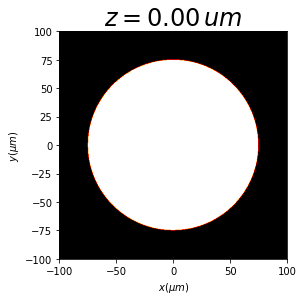

In [6]:
difraccion_biprism_Fresnel(u1, z_mask=0*mm)

And now, at different increasing distances:

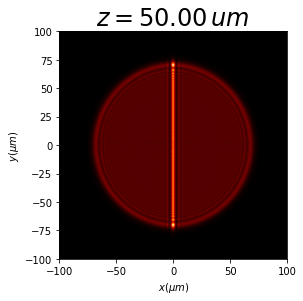

In [7]:
difraccion_biprism_Fresnel(u1,z_mask=50*um)

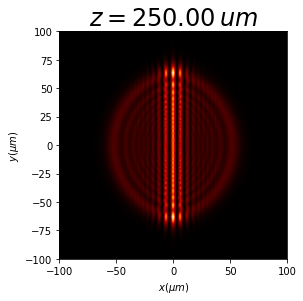

In [8]:
difraccion_biprism_Fresnel(u1,z_mask=250*um)

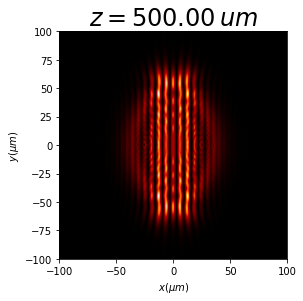

In [9]:
difraccion_biprism_Fresnel(u1,z_mask=0.5*mm)

Nevertheless, after a certain distance, the light from both biprism separates and interferences is not produced:

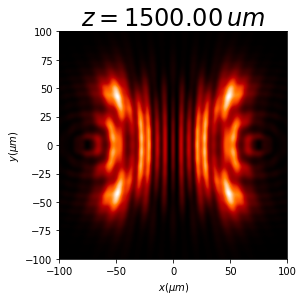

In [10]:
difraccion_biprism_Fresnel(u1,z_mask=1.5*mm)

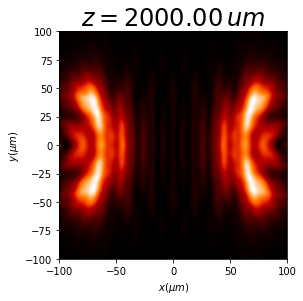

In [11]:
difraccion_biprism_Fresnel(u1,z_mask=2*mm)

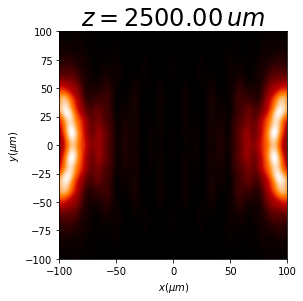

In [12]:
difraccion_biprism_Fresnel(u1,z_mask=2.5*mm)

We can see that fringes appear while the two beams, produced by it face of the Fresnel briprism, coincides in space.

## XZ formalism

Now, let us show the same case for XZ formalism. In this case, we can see how light is modified by the briprism, as no Thin Element Approximation is necessary.

In [13]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_masks_XZ import Scalar_mask_XZ
from diffractio.scalar_sources_X import Scalar_source_X

In [14]:
num_x = 1024*16
num_z = 1024*2
x0 = np.linspace(-75, 75, num_x)
z0_near = np.linspace(0*um, 25*um, num_z)
z0_all = np.linspace(0*um, 1000*um, num_z)

wavelength = 0.6238 * um


In [15]:
u0 = Scalar_source_X(x=x0, wavelength=wavelength)
u0.plane_wave()


In [16]:
t0 = Scalar_mask_XZ(x=x0, z=z0_near, wavelength=wavelength)
t0.biprism(r0=(0*um, 5*um), length=100*um, height=5*um, refraction_index=1.5, angle=0*degrees)
t0.incident_field(u0)


In [17]:
t0.BPM()

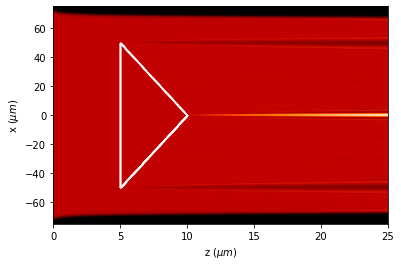

In [18]:
t0.draw(kind='intensity', draw_borders=True)

(-50, 50)

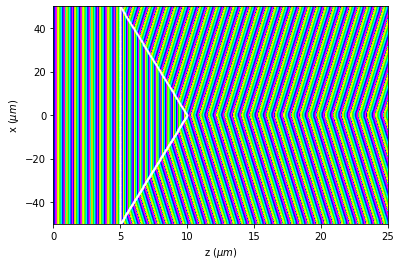

In [19]:
t0.draw(kind='phase', draw_borders=True)
plt.xlim(0,25)
plt.ylim(-50,50)

In [20]:
u_far = Scalar_mask_XZ(x=x0, z=z0_all, wavelength=wavelength)
u_far.biprism(r0=(0*um, 5*um), length=100*um, height=5*um, refraction_index=1.5, angle=0*degrees)
u_far.incident_field(u0)


In [21]:
u_far.BPM()

(-50.0, 50.0)

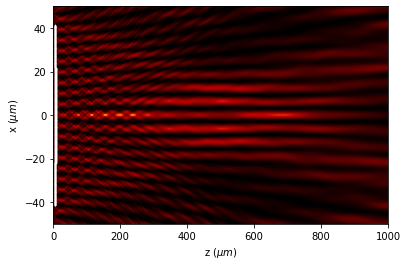

In [22]:
u_far.draw(kind='intensity', draw_borders=True)
plt.ylim(-50*um, 50*um)

(-50.0, 50.0)

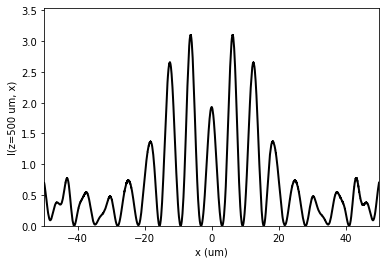

In [23]:
u_field_last_plane=u_far.profile_transversal(z0=500*um)
plt.xlim(-50*um, 50*um)

Here, we see the intensity distribution at z=500$\mu$m, showing the interference process.

In addition, in the XZ formalism we have a tool for interactively draws the profiles at different distances.

<IPython.core.display.Javascript object>


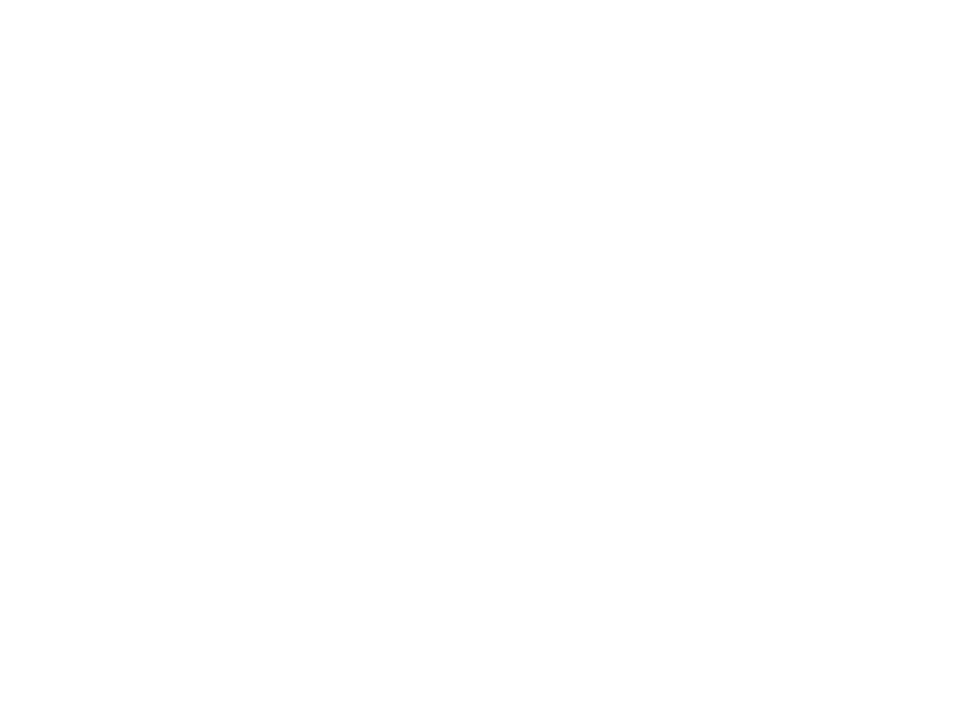

In [24]:
%matplotlib notebook
u_far.draw_profiles_interactive(kind='intensity')

In [25]:
%matplotlib inline

## Polarization

In [60]:
from diffractio import degrees, mm, plt, sp, um, np
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_paraxial_sources_XY import Vector_paraxial_source_XY
from diffractio.vector_paraxial_masks_XY import Vector_paraxial_mask_XY
from diffractio.vector_paraxial_fields_XY import Vector_paraxial_field_XY

from matplotlib import rcParams
rcParams['figure.figsize']=12,12

In [27]:
length = 1000 * um
numdatos = 1024
x0 = np.linspace(-length / 2, length / 2, numdatos)
y0 = np.linspace(-length / 2, length / 2, numdatos)
wavelength = 0.6238 * um


In [28]:
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.plane_wave()

t0 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t0.circle(r0=(0 * um, 0 * um), radius=(1000 * um, 1000 * um))


In [29]:
t1 = Scalar_mask_XY(x=x0, y=y0, wavelength=wavelength)
t1.biprism_fresnel(
    r0=(0 * um, 0 * um), ancho=1000 * um, height=5 * um, n=1.5)

u1 = t0 * t1 * u0

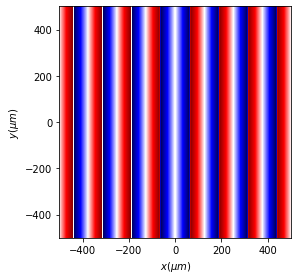

In [30]:
u1.draw(kind='phase');

In [31]:
EM0 = Vector_paraxial_source_XY(x0, y0, wavelength)
EM0.gauss(
    A=1,
    r0=(0 * um, 0 * um),
    z=0 * um,
    w0=(75 * um, 75 * um),
    kind='polarization',
    v=[1, 1])

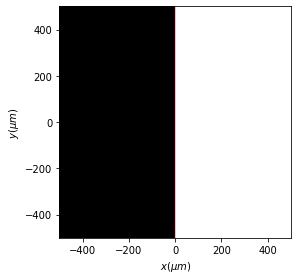

In [32]:
t0=Scalar_mask_XY(x0,y0,wavelength)
t0.two_levels(level1=0, level2=1, xcorte=0, angle=0*degrees)
t0.draw();

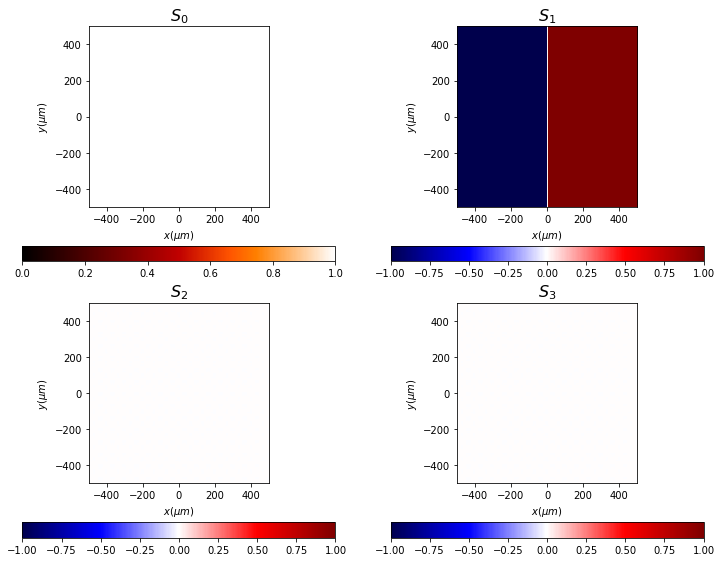

In [33]:
M2=Vector_paraxial_mask_XY(x=x0, y=y0, wavelength=wavelength)
M2.complementary_masks(t0, v1=(1, 0), v2=(0,1))
M2.draw('stokes');

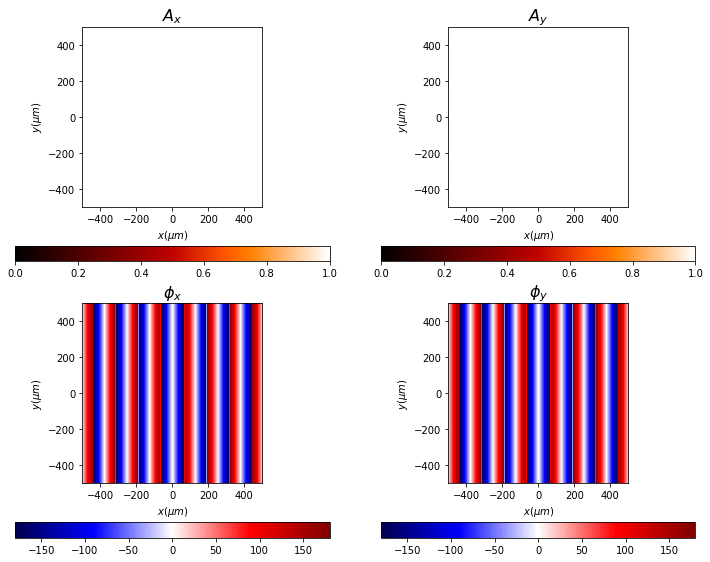

In [34]:
M3=Vector_paraxial_mask_XY(x0,y0,wavelength)
M3.equal_masks(u1)
M3.draw('fields');

In [35]:
M4=M2*M3

In [107]:
M5=M4.RS(z=25*mm)

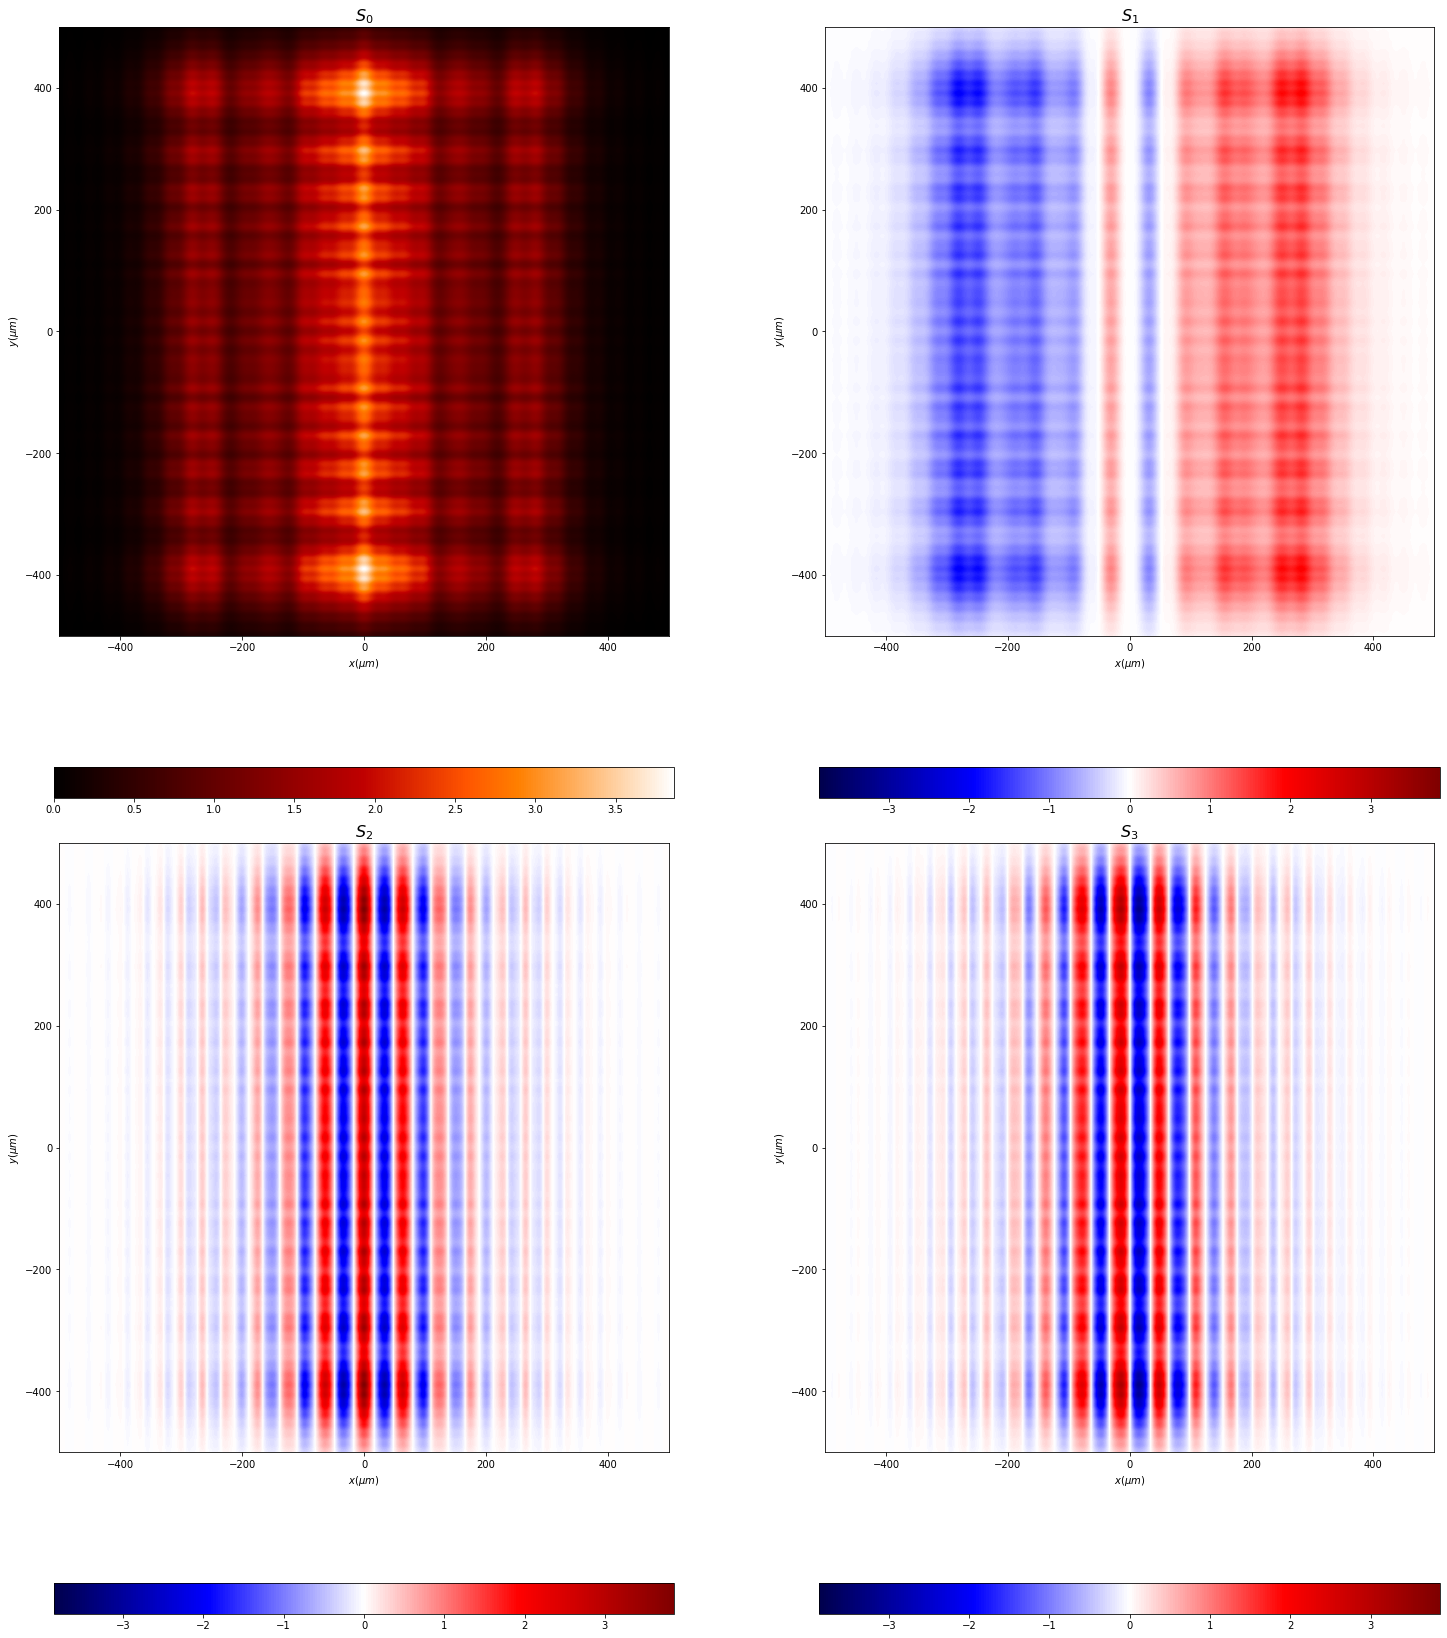

In [108]:
M5.draw('stokes');

(<matplotlib.image.AxesImage at 0x7f8fb946d9e8>,
 <matplotlib.image.AxesImage at 0x7f8fb7683978>)

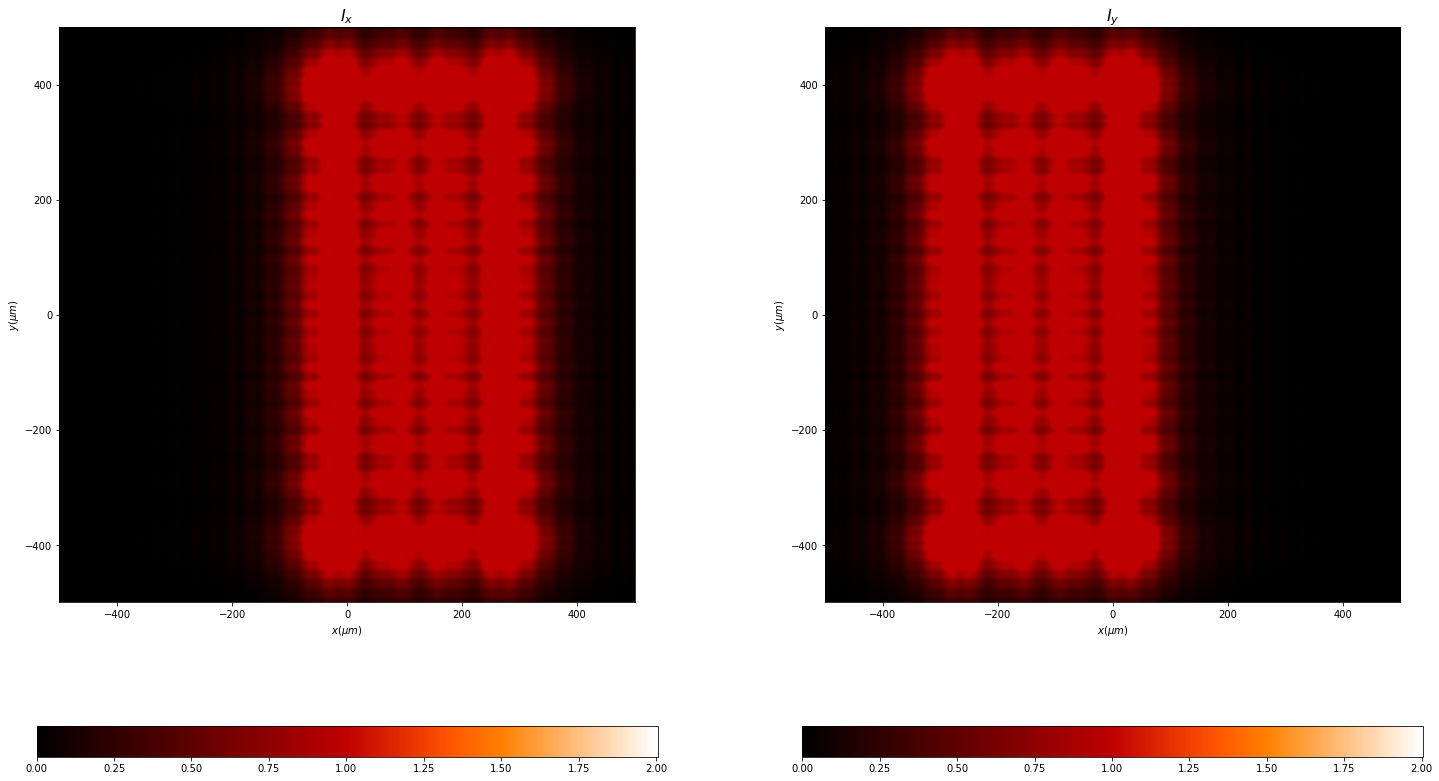

In [109]:
M5.draw('intensities')

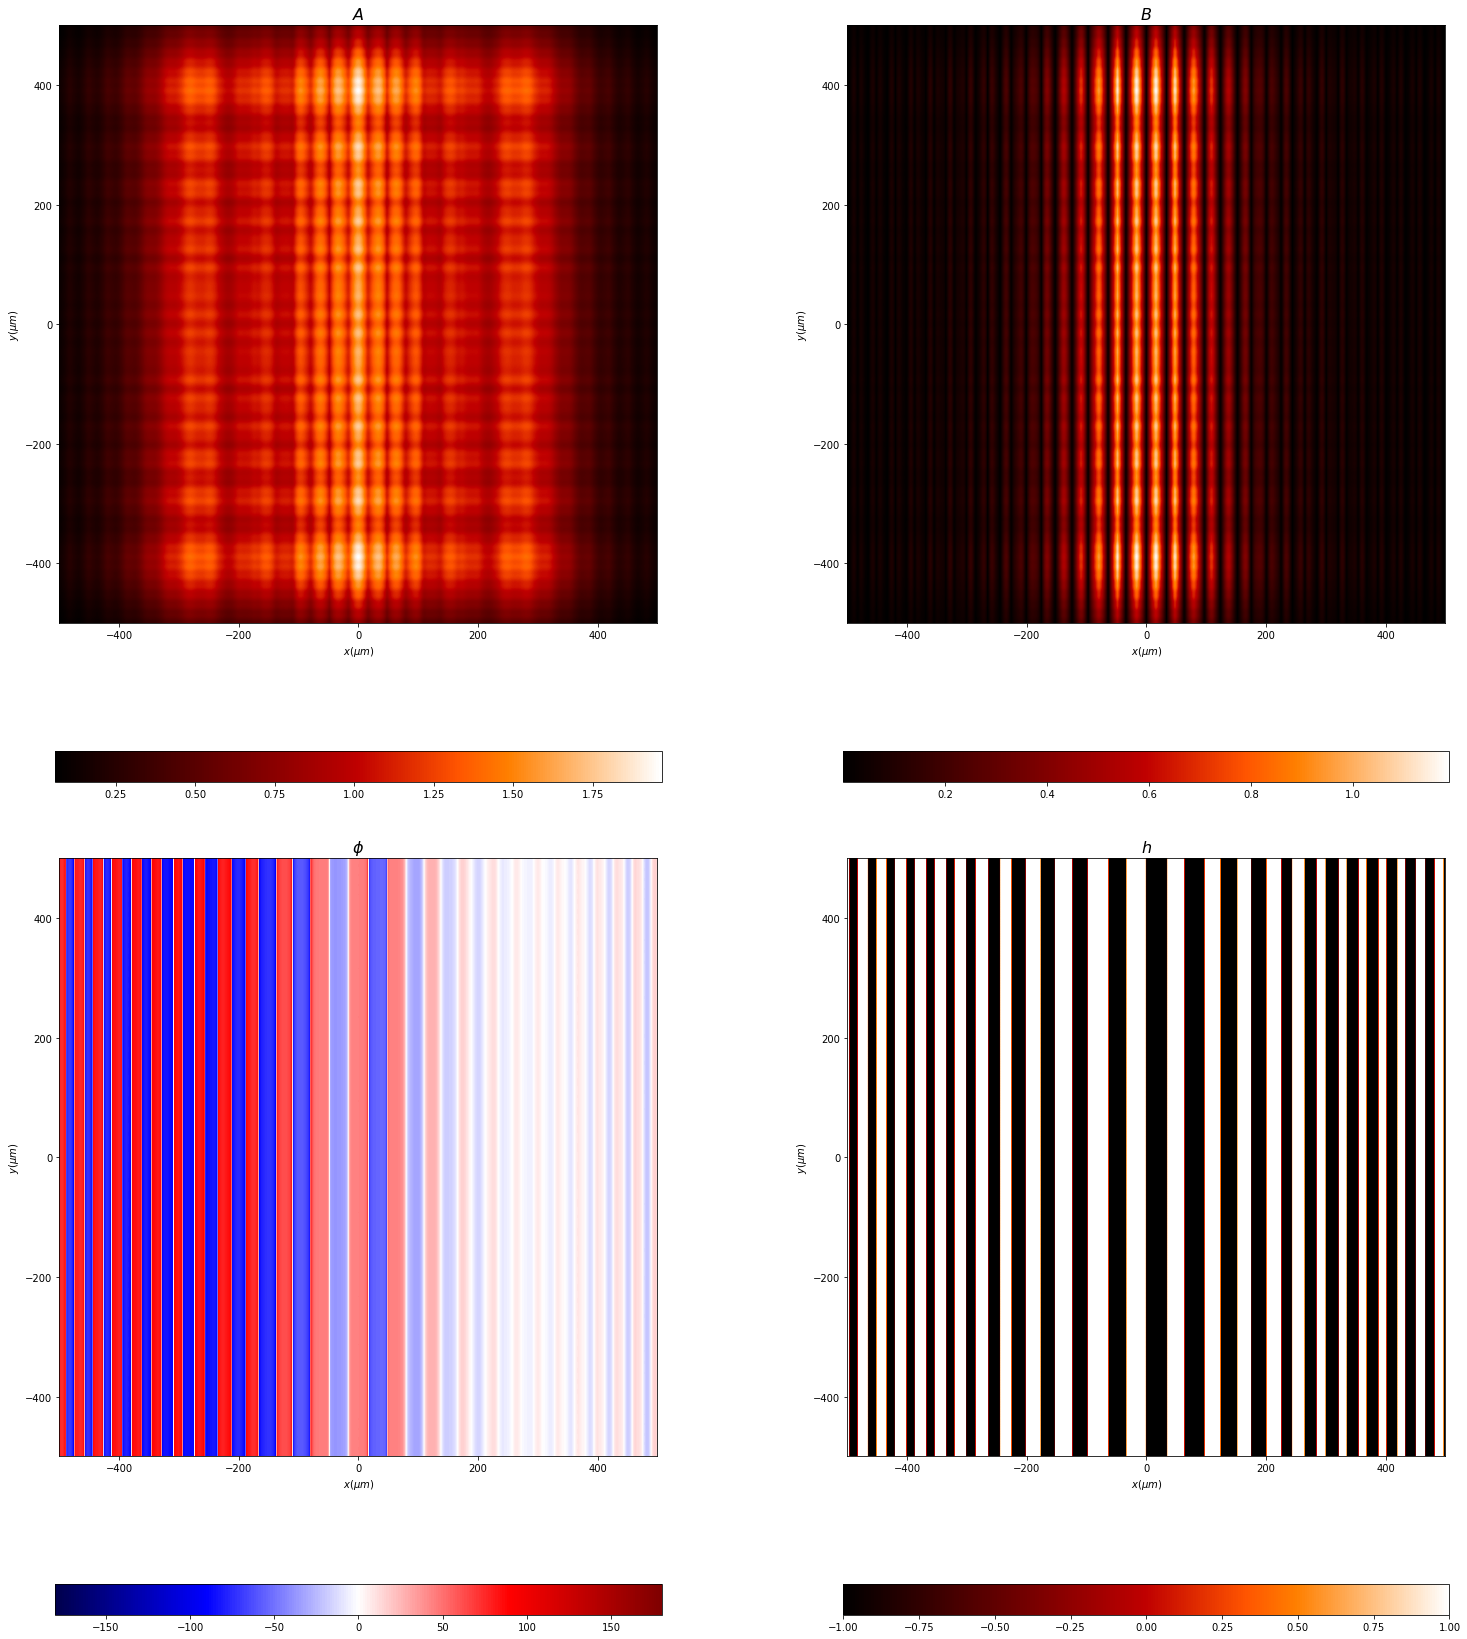

In [110]:
M5.draw('param_ellipse');

In [40]:
from diffractio.utils_math import nearest
from diffractio.vector_paraxial_fields_XY import _compute1Elipse__

In [41]:
def __compute_ellipses(M,A, B, theta, h):
    """computes polarization ellipse for drawing

    Parameters:
        A (float): axis 1 of ellipse
        B (float): axis 2 of ellipse
        theta (float): angle of ellipse
        h (float): to remove
    """
    A = A 
    B = B 

    fi = np.linspace(0, 2 * np.pi, 64)
    cf = np.cos(fi - theta)
    sf = np.sin(fi - theta)

    r = 1 / np.sqrt(np.abs(cf / (A + eps)**2 + sf**2 / (B + eps)**2))

    x = r * np.cos(fi) + x0
    y = r * np.sin(fi) + y0

    return x, y


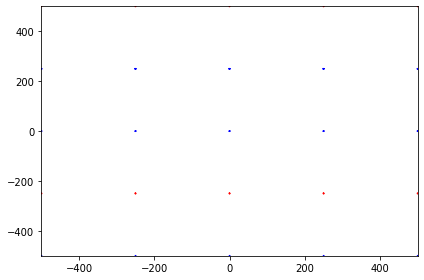

In [42]:
def draw_ellipses(M, num_ellipses=(5,5)):
    """__internal__: draw ellipses

        Parameters:
            numElipses (int): number of ellipses for parameters_ellipse
            amplification (float): amplification of ellipses
        """
    
    Dx=M.x[1]-M.x[0]
    #determine positions of ellipses
    
    #extract ellipses and compute
    
    #normalize sizes to fit a square of size given by area
    
    
    #draw intensity
    
    #draw ellipses
    A, B, theta, h = M.polarization_ellipse(pol_state=None, matrix=True)

    x0 = np.linspace(M.x[0], M.x[-1], num_ellipses[0])
    y0 = np.linspace(M.y[0], M.y[-1], num_ellipses[1])

    for xi in x0:
        [i, tmp, tmp] = nearest(M.x, xi)
        for yj in y0:
            [j, tmp, tmp] = nearest(M.y, yj)
            x, y = _compute1Elipse__(xi, yj, A[i, j], B[i, j], theta[i, j],
                                     1, 1)
            if h[i, j] == 1:
                plt.plot(x, y, 'b')
            else:
                plt.plot(x, y, 'r')

    plt.xlim(M.x[0], M.x[-1])
    plt.ylim(M.y[0], M.y[-1])
    plt.subplots_adjust(
        left=0, bottom=0, right=1, top=1, wspace=0.05, hspace=0)
    plt.tight_layout()

    
    

draw_ellipses(M5)

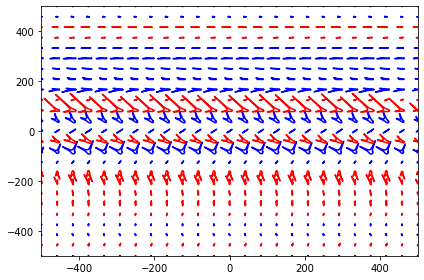

In [43]:
M5.__draw_ellipses__(numElipses=25, )

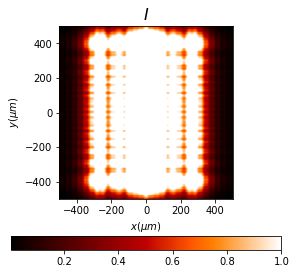

In [44]:
M5.draw()

In [101]:
M5 = Vector_paraxial_source_XY(x0, y0, wavelength)
M5.gauss(
    A=1,
    r0=(0 * um, 0 * um),
    z=0 * um,
    w0=(250 * um, 250 * um),
    kind='transversal')

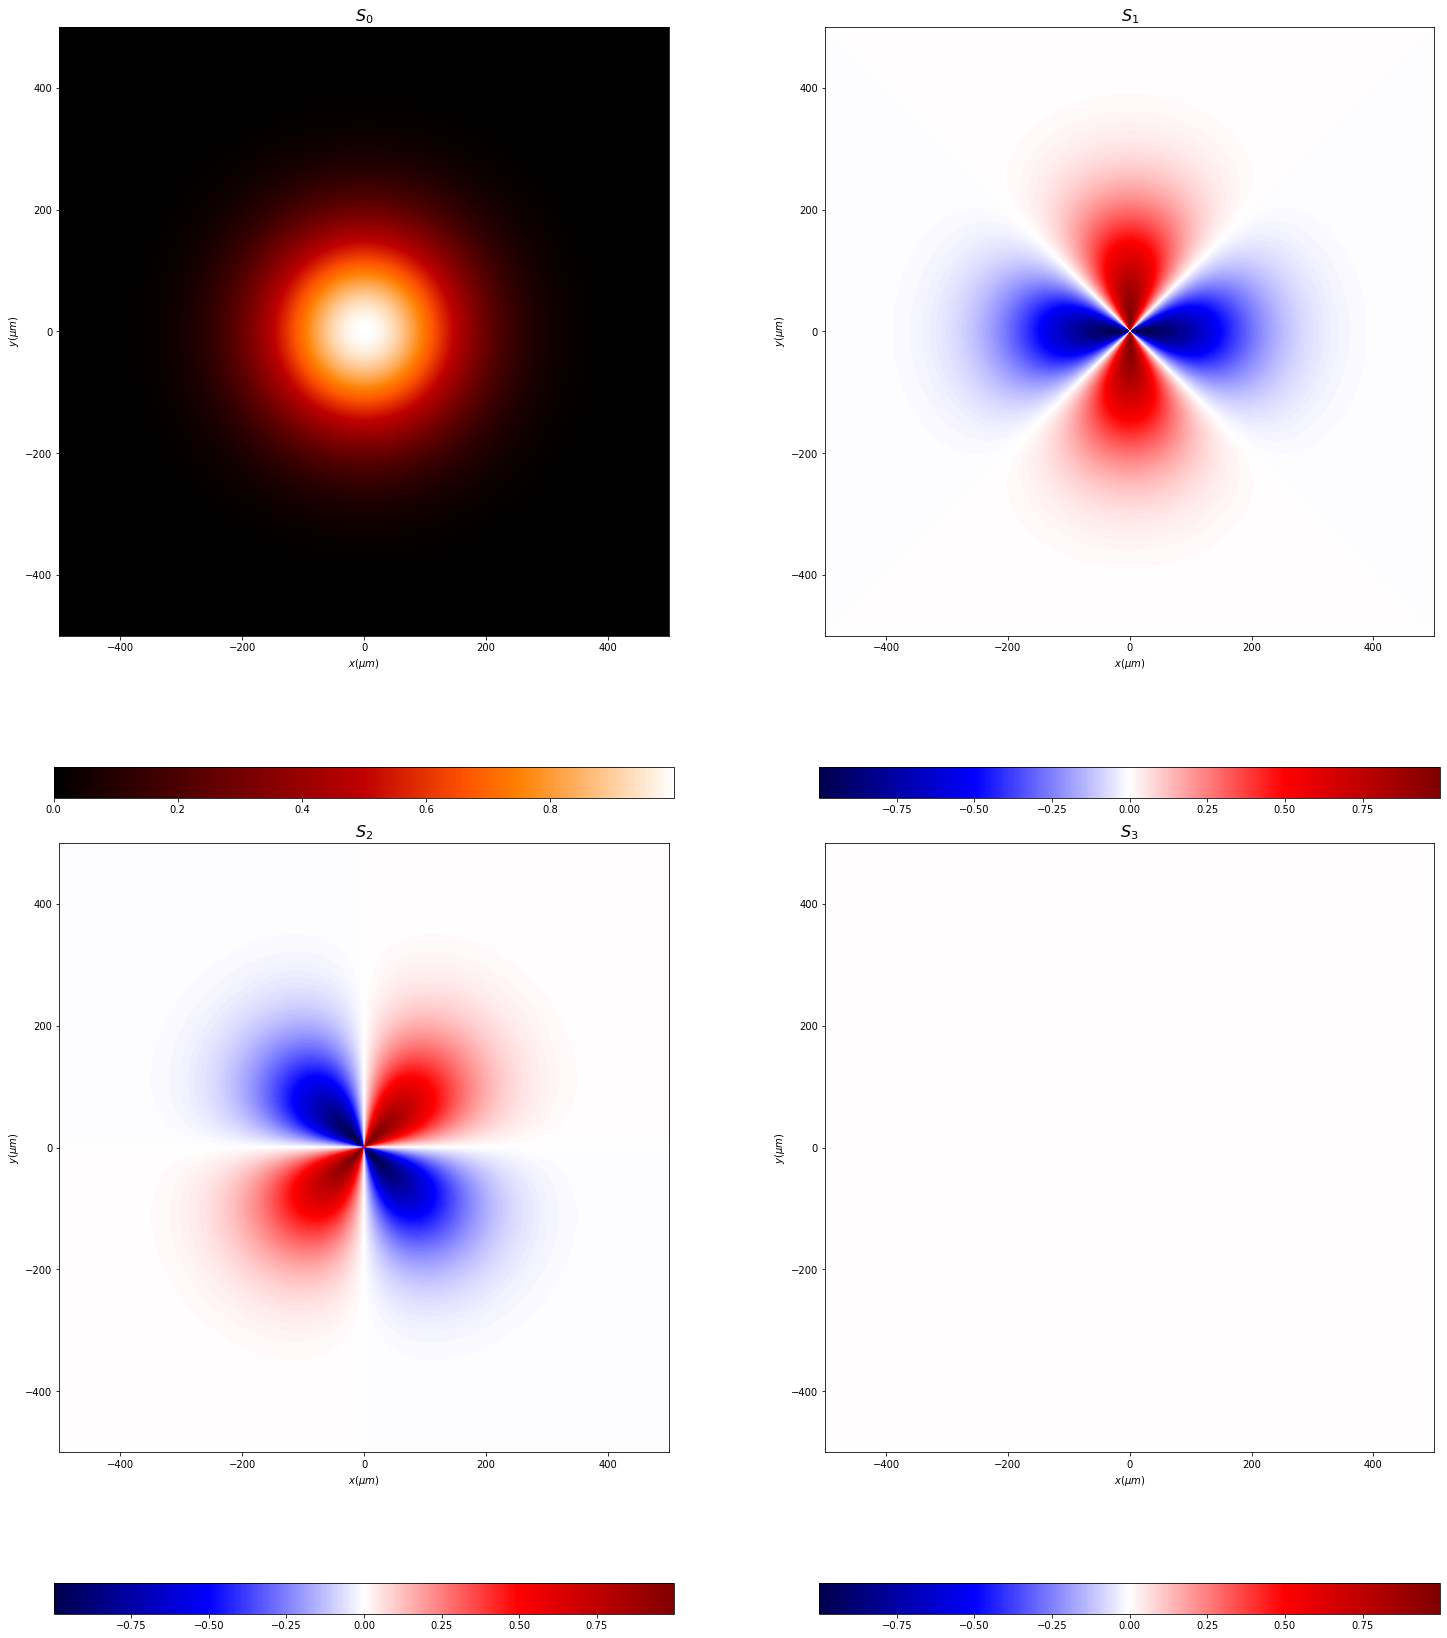

In [102]:
M5.draw('stokes');

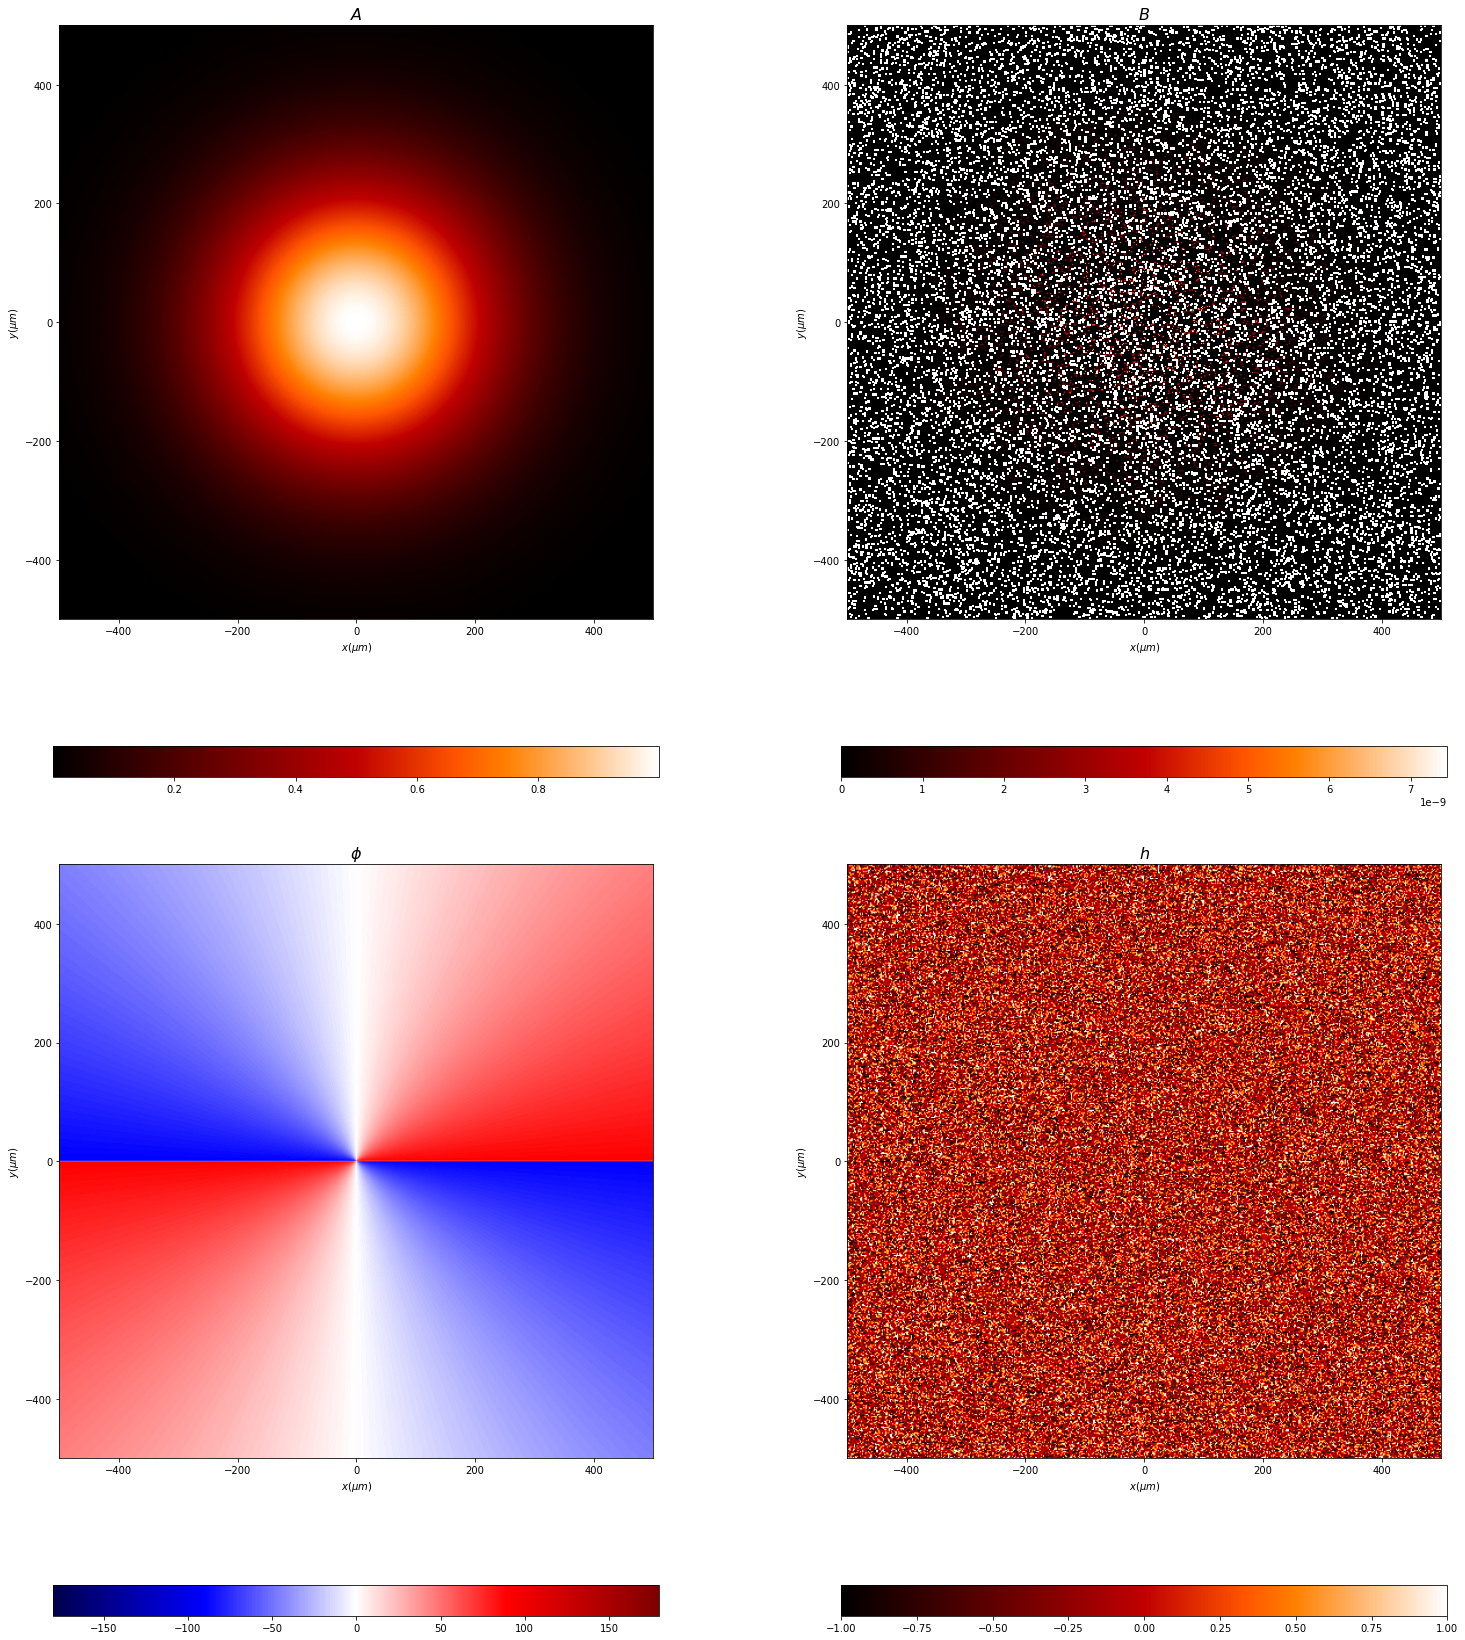

In [103]:
M5.draw('param_ellipse');

In [116]:
num_ellipses=(21,21)

Dx=M5.x[-1]-M5.x[0]
Dy=M5.y[-1]-M5.y[0]
size_x=Dx/(num_ellipses[0])
size_y=Dy/(num_ellipses[1])
x_centers=size_x/2+size_x*np.array(range(0,num_ellipses[0]))
y_centers=size_y/2+size_y*np.array(range(0,num_ellipses[1]))

num_x,num_y=len(M5.x), len(M5.y)
ix_centers=num_x/(num_ellipses[0])
iy_centers=num_y/(num_ellipses[1])

ix_centers=(np.round(ix_centers/2+ix_centers*np.array(range(0,num_ellipses[0])))).astype('int')
iy_centers=(np.round(iy_centers/2+iy_centers*np.array(range(0,num_ellipses[1])))).astype('int')


print(num_x,num_y, ix_centers, iy_centers)
print(Dx,Dy, size_x,size_y)
print(x_centers, y_centers)

Ix_centers, Iy_centers=np.meshgrid(ix_centers.astype('int'), iy_centers.astype('int'))
print(Ix_centers, Iy_centers)


I = np.abs(M5.Ex[Ix_centers, Iy_centers])**2 + np.abs(M5.Ey[[Ix_centers, Iy_centers]])**2
Q = np.abs(M5.Ex[Ix_centers, Iy_centers])**2 - np.abs(M5.Ey[Ix_centers, Iy_centers])**2
U = 2 * np.real(M5.Ex[Ix_centers, Iy_centers] * np.conjugate(M5.Ey[Ix_centers, Iy_centers]))
V = 2 * np.imag(M5.Ex[Ix_centers, Iy_centers] * np.conjugate(M5.Ey[Ix_centers, Iy_centers]))


1024 1024 [  24   73  122  171  219  268  317  366  414  463  512  561  610  658
  707  756  805  853  902  951 1000] [  24   73  122  171  219  268  317  366  414  463  512  561  610  658
  707  756  805  853  902  951 1000]
1000.0 1000.0 47.61904761904762 47.61904761904762
[ 23.80952381  71.42857143 119.04761905 166.66666667 214.28571429
 261.9047619  309.52380952 357.14285714 404.76190476 452.38095238
 500.         547.61904762 595.23809524 642.85714286 690.47619048
 738.0952381  785.71428571 833.33333333 880.95238095 928.57142857
 976.19047619] [ 23.80952381  71.42857143 119.04761905 166.66666667 214.28571429
 261.9047619  309.52380952 357.14285714 404.76190476 452.38095238
 500.         547.61904762 595.23809524 642.85714286 690.47619048
 738.0952381  785.71428571 833.33333333 880.95238095 928.57142857
 976.19047619]
[[  24   73  122  171  219  268  317  366  414  463  512  561  610  658
   707  756  805  853  902  951 1000]
 [  24   73  122  171  219  268  317  366  414  463  512

/home/luismiguel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


In [117]:
Ip = np.sqrt(Q**2 + U**2 + V**2)
L = Q + 1.j * U

A = np.real(np.sqrt(0.5 * (Ip + np.abs(L))))
B = np.real(np.sqrt(0.5 * (Ip - np.abs(L))))
theta = 0.5 * np.angle(L)
h = np.sign(V)


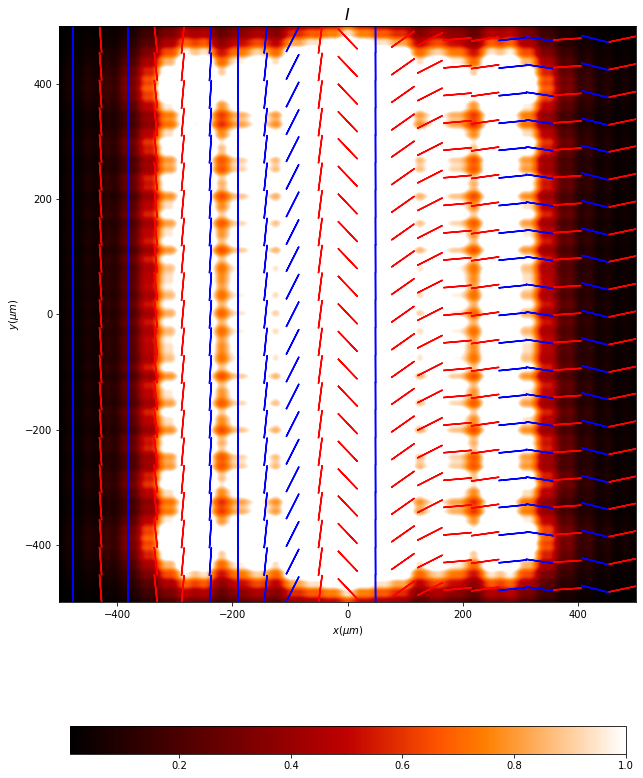

In [118]:
M5.draw('intensity')

fi = np.linspace(0, 2 * np.pi, 16)
eps=1e-5

for i,xi in enumerate(ix_centers):
    for j,yj in enumerate(iy_centers):
        #print(i,xi,j,yj, M5.x[i], M5.y[j])
        
        a = A[j,i]
        b = B[j,i]


        xt_ellipse = a * np.cos(fi)*np.sin(theta[j,i])+b*np.cos(fi)*np.sin(theta[j,i])
        yt_ellipse = -a * np.cos(fi)*np.cos(theta[j,i])+b*np.cos(fi)*np.cos(theta[j,i])
        
        max_r=np.sqrt(xt_ellipse**2+yt_ellipse**2).max()
        xt_ellipse=xt_ellipse/max_r*size_y/2+ M5.x[int(xi)]
        yt_ellipse=yt_ellipse/max_r*size_x/2+ M5.y[int(yj)]

        if h[j,i] == 1:
            plt.plot(yt_ellipse, xt_ellipse,'b')
        else:
            plt.plot(yt_ellipse, xt_ellipse, 'r')

    

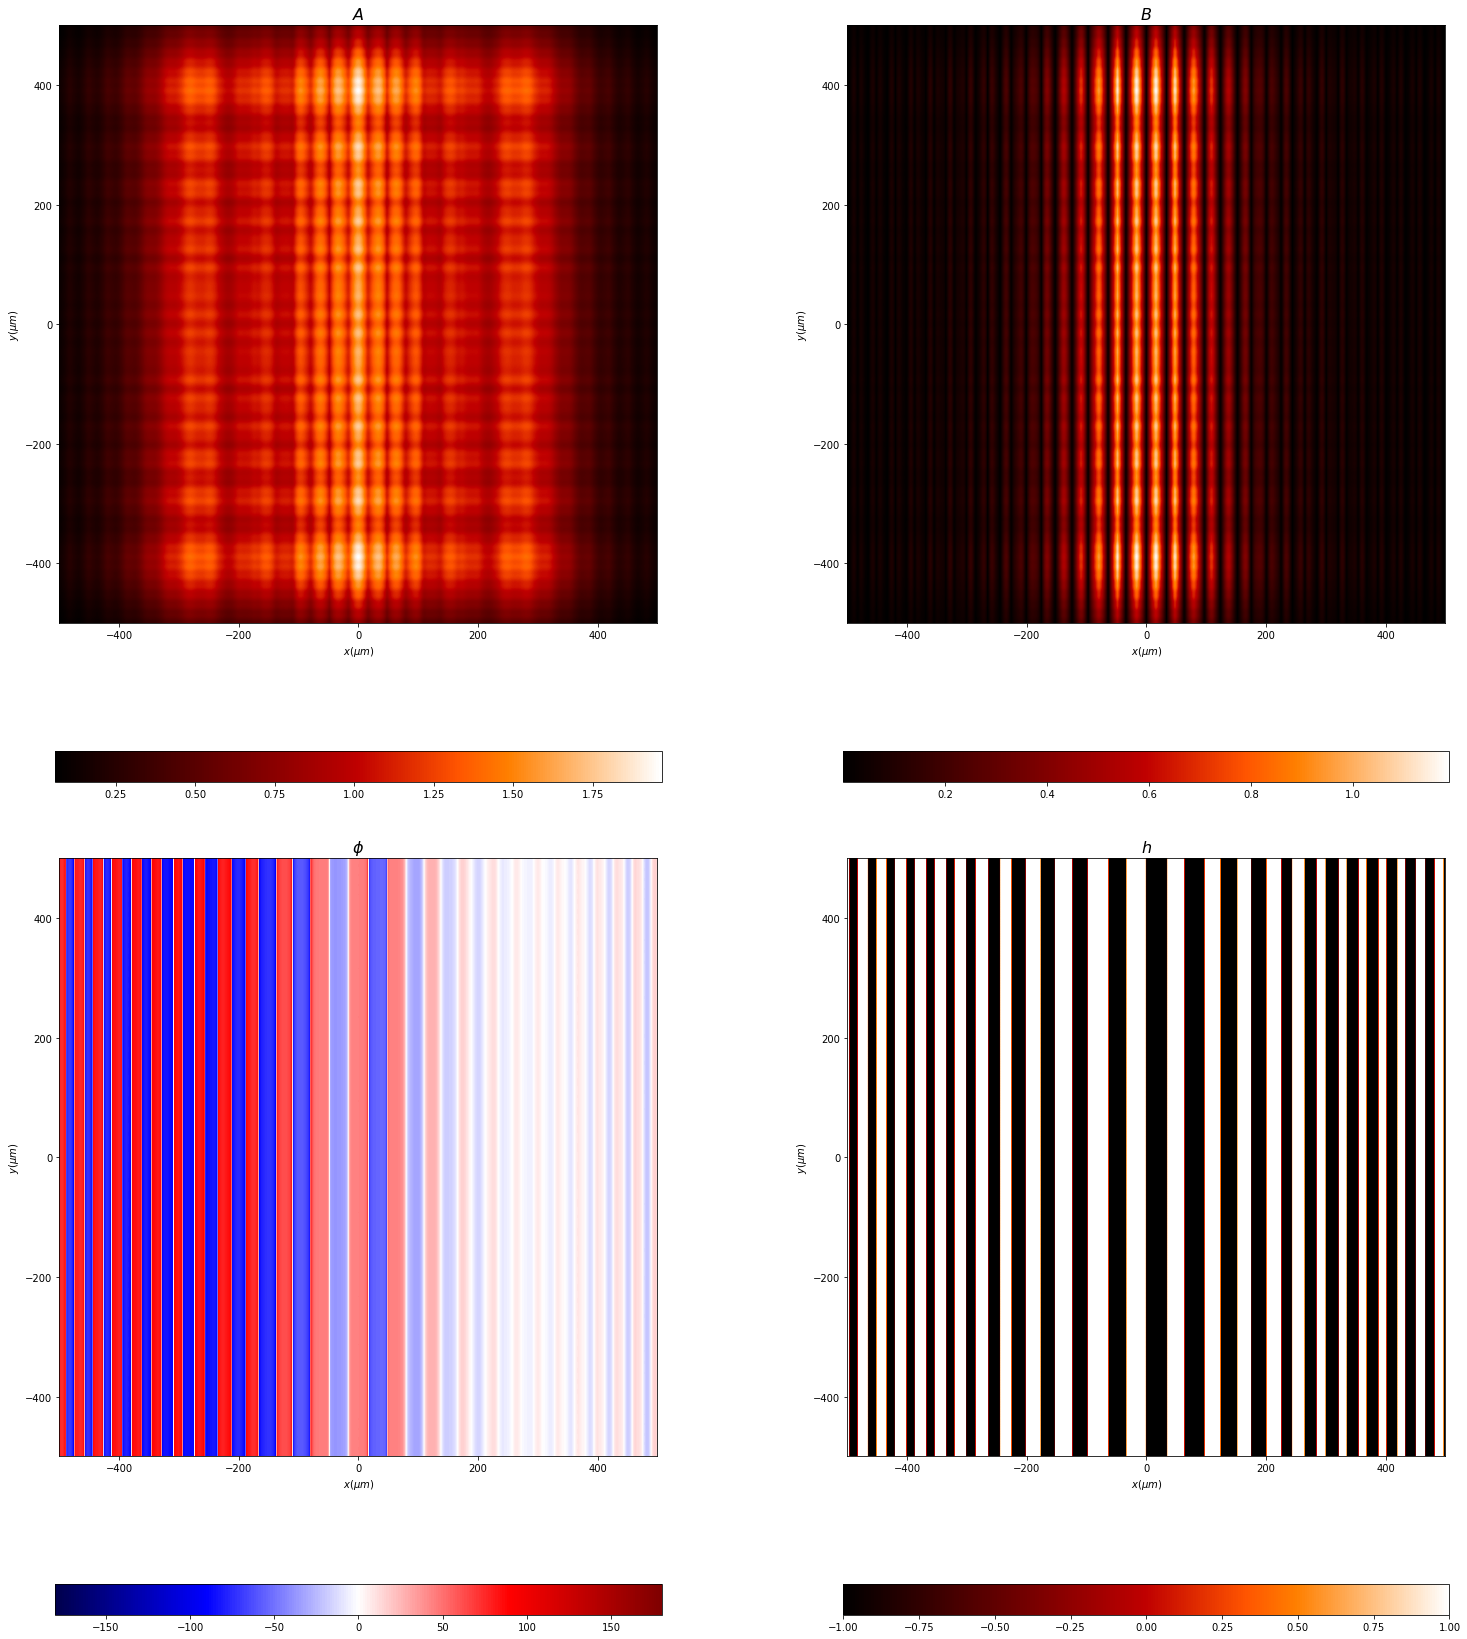

In [120]:
M5.draw('param_ellipse');